In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import numpy as np


# Define metrics
def evaluate(y_true, y_proba):
    y_pred = np.round(y_proba)
    return {
        'Precision': precision_score(y_true, y_pred, average='macro'),
        'Recall': recall_score(y_true, y_pred, average='macro'),
        'Macro f1': f1_score(y_true, y_pred, average='macro'),
        'Accuracy': accuracy_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_proba)
    }

# From Final version

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

data_df = pd.read_csv('C:/Users/GM/PycharmProjects/MMD6020_Final_Project/src/data/chbmit_preprocessed_data.csv')

RANDOM_SEED = 42

# Load data
# data_df = pd.read_csv('/content/drive/MyDrive/MMD6020_Final_Project/data/processed/chbmit_preprocessed_data.csv')

# Separate X and y
X = data_df.drop(['Outcome'], axis=1)
y = data_df['Outcome']

# Split into train,validation and test
X_train, X_val_test, y_train, y_val_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=RANDOM_SEED)
X_val, X_test, y_val, y_test = train_test_split(X_val_test,y_val_test,test_size=0.5, stratify=y_val_test, random_state=RANDOM_SEED)

import xgboost as xgb


xgb_HP = xgb.XGBClassifier(tree_method="gpu_hist",
                           max_depth = 17,
                           gamma = 0.4081632653061224,
                           eta = 0.3157894736842105,
                           reg_lambda = 4,
                           reg_alpha = 2)
# Fit the model using predictor X and response y.
xgb_HP.fit(X_train, y_train)

y_pred_train = xgb_HP.predict_proba(X_train)[::,1]
train_metrics = evaluate(y_train, y_pred_train)
print('On training data: ', train_metrics)

y_pred_val = xgb_HP.predict_proba(X_val)[::,1]
val_metrics = evaluate(y_val, y_pred_val)
print('On validation data: ', val_metrics)

On training data:  {'Precision': 0.9708349769015993, 'Recall': 0.9697005459790669, 'Macro f1': 0.9696822840847077, 'Accuracy': 0.9697005459790669, 'ROC AUC': 0.9932489261238777}
On validation data:  {'Precision': 0.9128873271686889, 'Recall': 0.912209523688871, 'Macro f1': 0.9121733911158947, 'Accuracy': 0.9122094270796081, 'ROC AUC': 0.969696716060462}


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

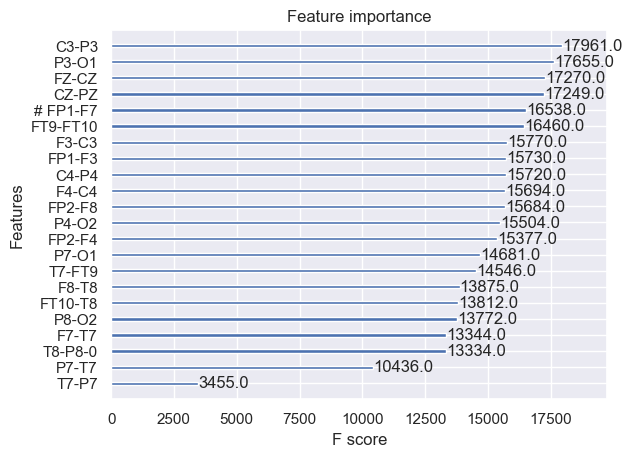

In [10]:
from xgboost import plot_importance
xgb_fea_imp=pd.DataFrame(list(xgb_HP.get_booster().get_fscore().items()), columns=['feature','importance']).sort_values('importance', ascending=False)
xgb_fea_imp
plot_importance(xgb_HP,)

# From test_xgb

In [4]:
data_df = pd.read_csv('C:/Users/GM/PycharmProjects/MMD6020_Final_Project/src/data/chbmit_preprocessed_data.csv')

RANDOM_SEED = 42

# Load data
# data_df = pd.read_csv('/content/drive/MyDrive/MMD6020_Final_Project/data/processed/chbmit_preprocessed_data.csv')

# Separate X and y
X = data_df.drop(['Outcome'], axis=1)
y = data_df['Outcome']

# Split into train,validation and test
X_train, X_val_test, y_train, y_val_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=RANDOM_SEED)
X_val, X_test, y_val, y_test = train_test_split(X_val_test,y_val_test,test_size=0.5, stratify=y_val_test, random_state=RANDOM_SEED)

import xgboost as xgb


xgb_HP = xgb.XGBClassifier(tree_method="gpu_hist",
                           max_depth = 17,
                           gamma = 0.4081632653061224,
                           eta = 0.3157894736842105,
                           reg_lambda = 4,
                           reg_alpha = 2)
# Fit the model using predictor X and response y.
xgb_HP.fit(X_train, y_train)

y_pred_train = xgb_HP.predict_proba(X_train)[::,1]
train_metrics = evaluate(y_train, y_pred_train)
print('On training data: ', train_metrics)

y_pred_val = xgb_HP.predict_proba(X_val)[::,1]
val_metrics = evaluate(y_val, y_pred_val)
print('On validation data: ', val_metrics)

On training data:  {'Precision': 0.9708349769015993, 'Recall': 0.9697005459790669, 'Macro f1': 0.9696822840847077, 'Accuracy': 0.9697005459790669, 'ROC AUC': 0.9932489261238777}
On validation data:  {'Precision': 0.9128873271686889, 'Recall': 0.912209523688871, 'Macro f1': 0.9121733911158947, 'Accuracy': 0.9122094270796081, 'ROC AUC': 0.969696716060462}


In [5]:
data_df

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
0,0.000020,0.000010,0.000022,0.000037,0.000032,0.000035,0.000016,0.000046,-0.000007,0.000043,...,0.000024,-0.000030,0.000010,-0.000011,-0.000037,0.000008,0.000012,0.000021,0.000021,0.0
1,0.000022,0.000008,0.000021,0.000039,0.000030,0.000032,0.000015,0.000039,-0.000006,0.000042,...,0.000026,-0.000017,0.000012,-0.000008,-0.000029,0.000010,0.000009,0.000023,0.000023,0.0
2,0.000021,0.000012,0.000021,0.000040,0.000025,0.000030,0.000013,0.000036,-0.000006,0.000040,...,0.000027,-0.000018,0.000014,-0.000009,-0.000034,0.000012,0.000009,0.000027,0.000027,0.0
3,0.000019,0.000012,0.000021,0.000039,0.000023,0.000028,0.000013,0.000035,-0.000008,0.000036,...,0.000030,-0.000024,0.000015,-0.000009,-0.000042,0.000009,0.000010,0.000033,0.000033,0.0
4,0.000019,0.000012,0.000021,0.000036,0.000023,0.000024,0.000012,0.000024,-0.000009,0.000032,...,0.000032,-0.000014,0.000017,-0.000008,-0.000031,0.000009,0.000008,0.000035,0.000035,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,0.000081,0.000047,0.000087,0.000074,0.000113,0.000063,0.000129,-0.000037,0.000102,-0.000106,...,-0.000036,0.000072,-0.000046,-0.000060,0.000070,-0.000169,0.000060,0.000070,0.000070,1.0
2097146,0.000093,0.000055,0.000087,0.000082,0.000133,0.000058,0.000133,-0.000036,0.000088,-0.000115,...,-0.000031,0.000087,-0.000049,-0.000067,0.000076,-0.000152,0.000068,0.000063,0.000063,1.0
2097147,0.000110,0.000061,0.000078,0.000085,0.000146,0.000049,0.000130,-0.000036,0.000076,-0.000119,...,-0.000033,0.000106,-0.000058,-0.000067,0.000075,-0.000145,0.000067,0.000062,0.000062,1.0
2097148,0.000133,0.000068,0.000082,0.000085,0.000157,0.000040,0.000123,-0.000033,0.000067,-0.000124,...,-0.000036,0.000107,-0.000073,-0.000073,0.000068,-0.000129,0.000073,0.000056,0.000056,1.0


In [5]:
xgb.__version__

'1.7.1'